In [1]:
import sys
import vtk
import tkinter as tk
from tkinter import *
from tkinter import filedialog
import pydicom as dicom
from pydicom.data import get_testdata_file
from datetime import datetime


import pydicom
import numpy
import numpy as np
import cv2
import os
import math
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import morphology


import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import imageio

import pydicom as dicom
import numpy as np
import os

import matplotlib.pyplot as plt
from PIL import ImageTk, Image
import customtkinter as ctk


In [2]:


def browse_file():
    global folder_path
    folder_path = "C:/Users/LENOVO/Desktop/BMD 404/project/data/series-000001"
    
browse_file()


In [3]:

def dicom_data():
    global folder_path_internal
    folder_path_internal = "C:/Users/LENOVO/Desktop/BMD 404/project/data/series-000001/image-000001.dcm"
    list_ct = dicom.read_file(folder_path_internal)
    global ds
    ds = dicom.dcmread(folder_path_internal)
    print(list_ct)
dicom_data()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 230
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111102150758591.03296050.69180943
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: '20061012'
(0008, 0013) Instance Creation Time              TM: '091605.0

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pydicom\valuerep.py:290: UserWarning: Invalid value for VR UI: '1.2.826.0.1.3680043.8.1055.1.20111102150758591.03296050.69180943'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pydicom\valuerep.py:290: UserWarning: Invalid value for VR UI: '1.2.826.0.1.3680043.8.1055.1.20111102150758591.96842950.07877442'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


In [4]:

# Load the DICOM files from the specified folder
dcm_files = os.listdir(folder_path)

# Sort the DICOM files by instance number
def get_instance_number(file_path):
    dcm = dicom.read_file(os.path.join(folder_path, file_path))
    return int(dcm.InstanceNumber)

dcm_files.sort(key=lambda x: get_instance_number(x))

# Load the pixel data from each DICOM file and stack into a 3D numpy array
dcm = dicom.read_file(os.path.join(folder_path, dcm_files[0]))
shape = (len(dcm_files), dcm.Rows, dcm.Columns)
if 'NumberOfFrames' in dcm:
    shape = (dcm.NumberOfFrames, dcm.Rows, dcm.Columns)

vol = np.zeros(shape, dtype=dcm.pixel_array.dtype)

for i, file_path in enumerate(dcm_files):
    dcm = dicom.read_file(os.path.join(folder_path, file_path))
    if 'NumberOfFrames' in dcm:
        vol[i:i+dcm.NumberOfFrames,:,:] = dcm.pixel_array
    else:
        vol[i,:,:] = dcm.pixel_array

# ---------------------------------------------------------------------------------------------------------------------------------------------------

# The shape of the stacked images in each plane (Axial, Coronal, and Sagittal, respectively)
n0, n1, n2 = vol.shape
# Print the ouput
#print("Number of Slices:\n\t", "Axial=", n0, "Slices\n\t","Coronal=", n1, "Slices\n\t","Sagittal=", n2, "Slices")

# Extract the voxel spacing information
spacing = [float(dcm.PixelSpacing[0]), float(dcm.PixelSpacing[1]), float(dcm.SliceThickness)]

# Compute the sampling in each plane
d0, d1, d2 = spacing[::-1] # Reverse order to match array indexing

# Print the output
# print("Sampling:\n\t", "Axial=", d2, "mm\n\t","Coronal=", d1, "mm\n\t","Sagittal=", d0, "mm")

# The aspect ratio along the axial plane
axial_asp = d1/d2
# The aspect ratio along the sagittal plane
sagittal_asp = d0/d1
# The aspect ratio along the coronal plane
coronal_asp = d0/d2
    

In [6]:
# ----------------------------------------------------------------------------------------------------------------------------

@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1),\
                  sagittal_slice=(0,n2-1))
def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))



  global axial_slice_segmentation

  global coronal_slice_segmentation

  global sagittal_slice_segmentation
  


  # Show the specfied slice on the axial plane with 'gray' color-map
  # and axial aspect ratio.
  ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  axial_slice_segmentation = axial_slice
  ax[0].axis('off')
  ax[0].set_title('Axial')
  # Show the specified slice on the coronal plane with 'gray' color-map
  # and coronal aspect ratio.
  ax[1].imshow(vol[:,coronal_slice,:], cmap='gray', aspect= coronal_asp)
  coronal_slice_segmentation = coronal_slice
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map
  # and sagittal aspect ratio.
  ax[2].imshow(vol[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  sagittal_slice_segmentation = sagittal_slice
  ax[2].axis('off')
  ax[2].set_title('Sagittal')

  #plt.imshow(vol[:,:,sagittal_slice])
  #plt.show()
  #print("sagittal_slice",sagittal_slice)



# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////



def bone_segmentation_func():

    # Load DICOM file
    #ds = pydicom.dcmread('C:/Users/LENOVO/Desktop/BMD 404/project/data/series-000001/image-000028.dcm')

    original_image_axial_slice = vol[axial_slice_segmentation,:,:]

    original_image_coronal_slice = vol[:,coronal_slice_segmentation,:]

    original_image_sagittal = vol[:,:,sagittal_slice_segmentation]

    
    
    bone_segmented_image_axial_slice = vol[axial_slice_segmentation,:,:]

    bone_segmented_image_coronal_slice = vol[:,coronal_slice_segmentation,:]
    
    bone_segmented_image_sagittal_slice = vol[:,:,sagittal_slice_segmentation]




    # Convert pixel values to Hounsfield units (HU)
    intercept = dcm.RescaleIntercept
    slope = dcm.RescaleSlope
    #hu_image = dcm.pixel_array * slope + intercept
    hu_image_axial = bone_segmented_image_axial_slice * slope + intercept
    hu_image_coronal = bone_segmented_image_coronal_slice * slope + intercept
    hu_image_sagittal = bone_segmented_image_sagittal_slice * slope + intercept


    # Clip the HU values to the desired range
    hu_min = 300
    hu_max = 1800
    # clipped_image = np.clip(hu_image, hu_min, hu_max)
    clipped_image_axial = np.clip(hu_image_axial, hu_min, hu_max)
    clipped_image_coronal = np.clip(hu_image_coronal, hu_min, hu_max)
    clipped_image_sagittal = np.clip(hu_image_sagittal, hu_min, hu_max)



    # Normalize the clipped image to the range [0, 1]
    # normalized_image = (clipped_image - hu_min) / (hu_max - hu_min)
    normalized_image_axial = (clipped_image_axial - hu_min) / (hu_max - hu_min)
    normalized_image_coronal = (clipped_image_coronal - hu_min) / (hu_max - hu_min)
    normalized_image_sagittal = (clipped_image_sagittal - hu_min) / (hu_max - hu_min)




    # Binarize the image using thresholding
    #threshold_value = 0.5
    #binary_image = np.where(normalized_image > threshold_value, 1, 0)

    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))
    ax1.imshow(normalized_image_axial, cmap= 'gray')
    ax1.set_title('Axial')
    ax2.imshow(normalized_image_coronal, cmap= 'gray')
    ax2.set_title('Coronal')
    ax3.imshow(normalized_image_sagittal, cmap= 'gray' )
    ax3.set_title('Sagittal')
    plt.show()




# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////





def bone_segmentation_func_bone_only():


    bone_segmented_image_axial_slice = vol[axial_slice_segmentation,:,:]

    bone_segmented_image_coronal_slice = vol[:,coronal_slice_segmentation,:]
    
    bone_segmented_image_sagittal_slice = vol[:,:,sagittal_slice_segmentation]



       # Convert pixel values to Hounsfield units (HU)
    intercept = dcm.RescaleIntercept
    slope = dcm.RescaleSlope
    # hu_image = dcm.pixel_array * slope + intercept
    hu_image = bone_segmented_image_axial_slice * slope + intercept
    hu_image_2 = bone_segmented_image_coronal_slice * slope + intercept
    hu_image_3 = bone_segmented_image_sagittal_slice * slope + intercept



# def window_image(original_image, window_center, window_width):
    def window_image(original_image, window_center, window_width):

        img_min = window_center - window_width // 2

        img_max = window_center + window_width // 2

        window_image = original_image.copy()

        window_image[window_image < img_min] = img_min

        window_image[window_image > img_max] = img_max


        return window_image


    def window_image_2(original_image, window_center, window_width):

        img_min = window_center - window_width // 2

        img_max = window_center + window_width // 2

        window_image = original_image.copy()

        window_image[window_image < img_min] = img_min

        window_image[window_image > img_max] = img_max


        return window_image


    def window_image_3(original_image, window_center, window_width):

        img_min = window_center - window_width // 2

        img_max = window_center + window_width // 2

        window_image = original_image.copy()

        window_image[window_image < img_min] = img_min

        window_image[window_image > img_max] = img_max


        return window_image


    bone_image = window_image(hu_image, 400, 1000)
    bone_image_2 = window_image_2(hu_image_2, 400, 1000)
    bone_image_3 = window_image_3(hu_image_3, 400, 1000)
    

    #global image1


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))
    ax1.imshow(bone_image, cmap= 'gray')
    ax1.set_title('Axial')
    ax2.imshow(bone_image_2, cmap= 'gray')
    ax2.set_title('Coronal')
    ax3.imshow(bone_image_3 , cmap= 'gray')
    ax3.set_title('Sagittal')
    plt.show()
    
    global image_temp_gui_1,image_temp_gui_2,image_temp_gui_3
    #image1 = bone_image
    image_temp_gui_1 = bone_image
    image_temp_gui_2 = bone_image_2
    image_temp_gui_3  = bone_image_3



# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


button = widgets.Button(description="Bone Segmentation")
display(button)

def on_button_clicked(b):
    print("working on the bone segmentation of the images please wait. .....")

    bone_segmentation_func_bone_only()
    bone_segmentation_func()
        
    # /*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/**/*/
        
    if b.description == "Bone Segmentation":


        # Create a custom tkinter application
        app = ctk.CTk()
        app.geometry("800x600")
        app.title("Image Viewer")

        # Load your images
        #image1 = Image.open("C:/Users/LENOVO/Desktop/BMD 404/project/pic/rm378-07.jpg")

        # Convert the NumPy array to a PIL Image
        #image = Image.fromarray(image1)

        global image_gui_1,image_gui_2,image_gui_3
        image_gui_1 = Image.fromarray(image_temp_gui_1)
        image_gui_2 = Image.fromarray(image_temp_gui_2)
        image_gui_3 = Image.fromarray(image_temp_gui_3)
        global photo1,photo2,photo3
        photo1 = ImageTk.PhotoImage(image_gui_1)
        photo2 = ImageTk.PhotoImage(image_gui_2)
        photo3 = ImageTk.PhotoImage(image_gui_3)


        # Create a function to display the images
        def display_images():
            # Create a new window using CTkToplevel
            toplevel = ctk.CTkToplevel(app)
            toplevel.title("Image Viewer")

            # Convert images to PhotoImage format

            # Create CTkLabel widgets to display the images
            label1 = ctk.CTkLabel(toplevel)
            label1.configure(image = photo1)
            label1.grid(row=1, column=1)  # Position label at row 2, column 2
            #label1.pack()
            label1.image = photo1  # Keep a reference to avoid garbage collection


            # Create CTkLabel widgets to display the images
            label2 = ctk.CTkLabel(toplevel)
            label2.configure(image = photo2)
            label2.grid(row=1, column=2)  # Position label at row 2, column 2
            #label2.pack()
            label2.image = photo2  # Keep a reference to avoid garbage collection


            label3 = ctk.CTkLabel(toplevel)
            label3.configure(image = photo3)
            label3.grid(row=1, column=3)  # Position label at row 2, column 2
            #label3.pack()
            label3.image = photo3  # Keep a reference to avoid garbage collection




        # Create a button to trigger the image display
        button_gui = ctk.CTkButton(app, text="Display Images", command=display_images)
        button_gui.pack()

        # Start the application event loop
        app.mainloop()
    
# /*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/**/*/
    
button.on_click(on_button_clicked)






# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////



interactive(children=(IntSlider(value=180, description='axial_slice', max=360), IntSlider(value=255, descripti…

Button(description='Bone Segmentation', style=ButtonStyle())

interactive(children=(IntSlider(value=180, description='axial_slice', max=360), IntSlider(value=255, descripti…

Button(description='Bone Segmentation', style=ButtonStyle())

working on the bone segmentation of the images please wait. .....


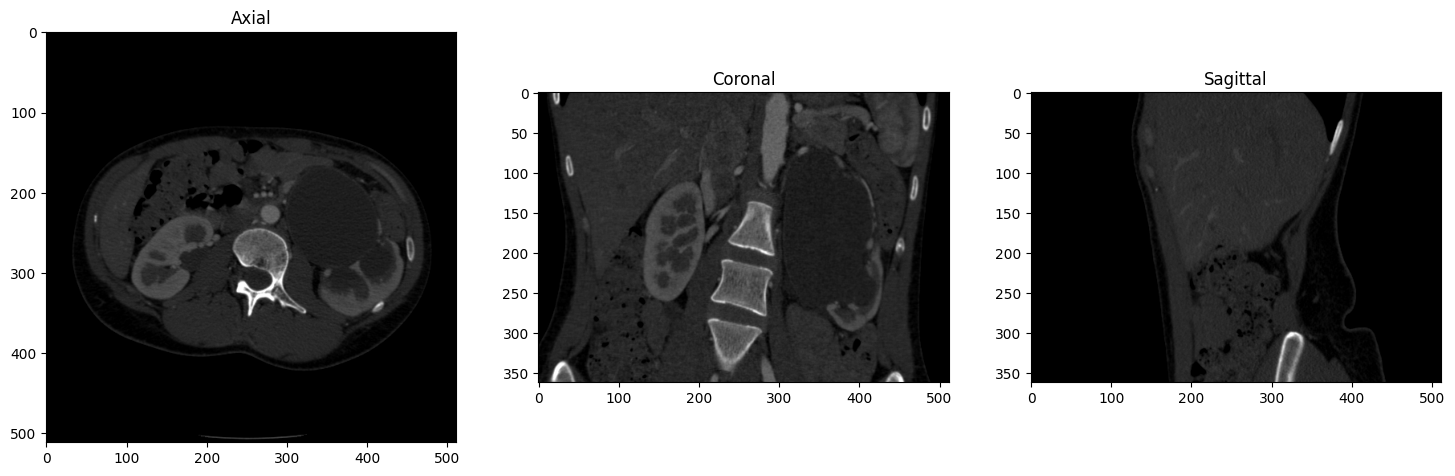

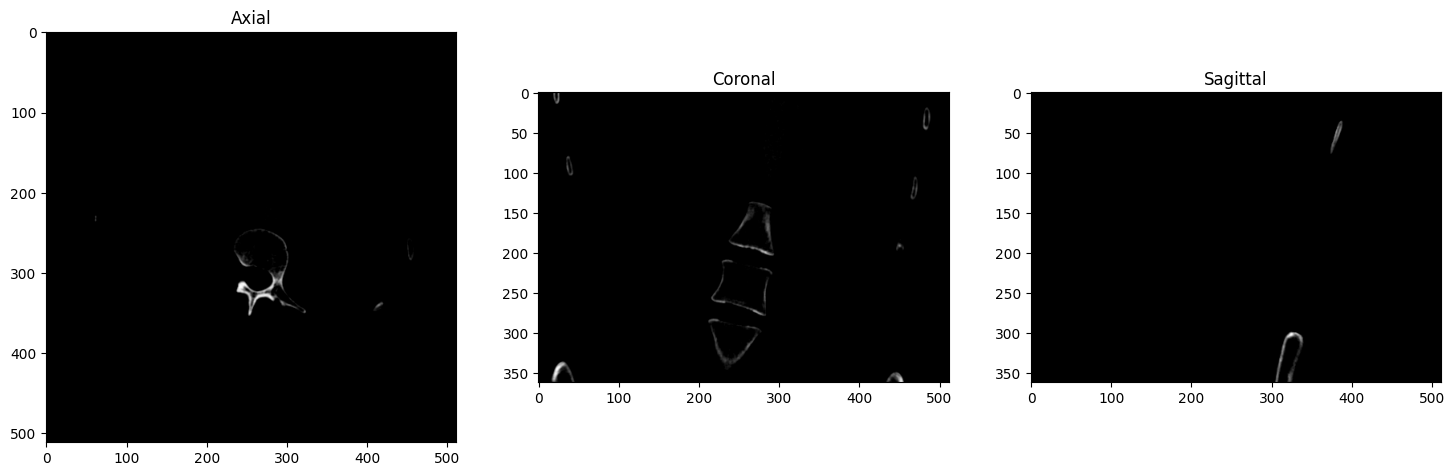

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\customtkinter\windows\widgets\core_widget_classes\ctk_base_class.py:179: UserWarning: CTkLabel Warning: Given image is not CTkImage but <class 'PIL.ImageTk.PhotoImage'>. Image can not be scaled on HighDPI displays, use CTkImage instead.

  warnings.warn(f"{type(self).__name__} Warning: Given image is not CTkImage but {type(image)}. Image can not be scaled on HighDPI displays, use CTkImage instead.\n")


working on the bone segmentation of the images please wait. .....


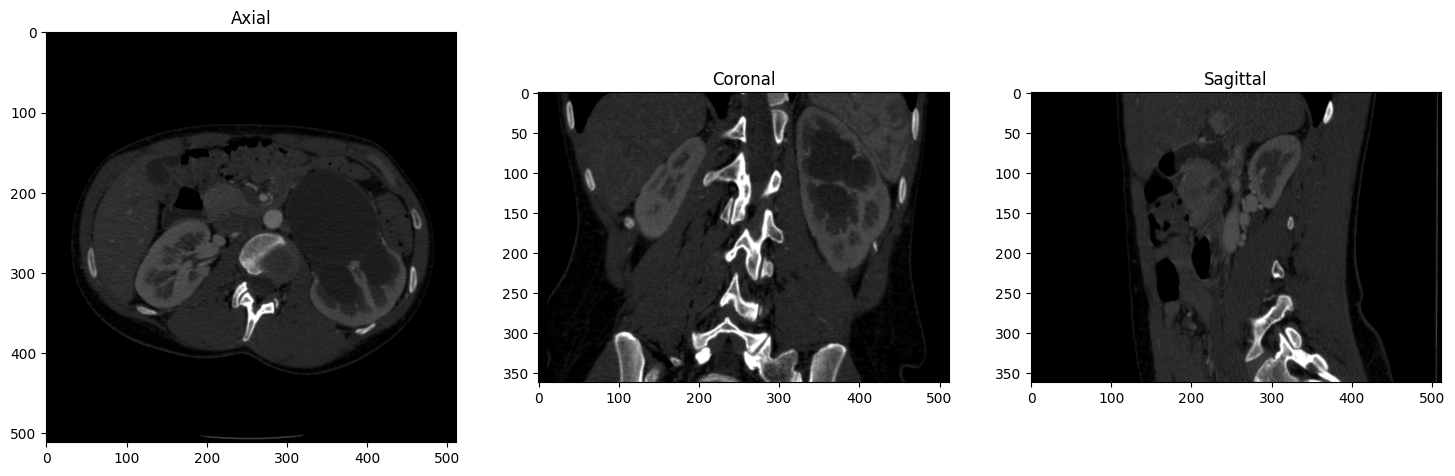

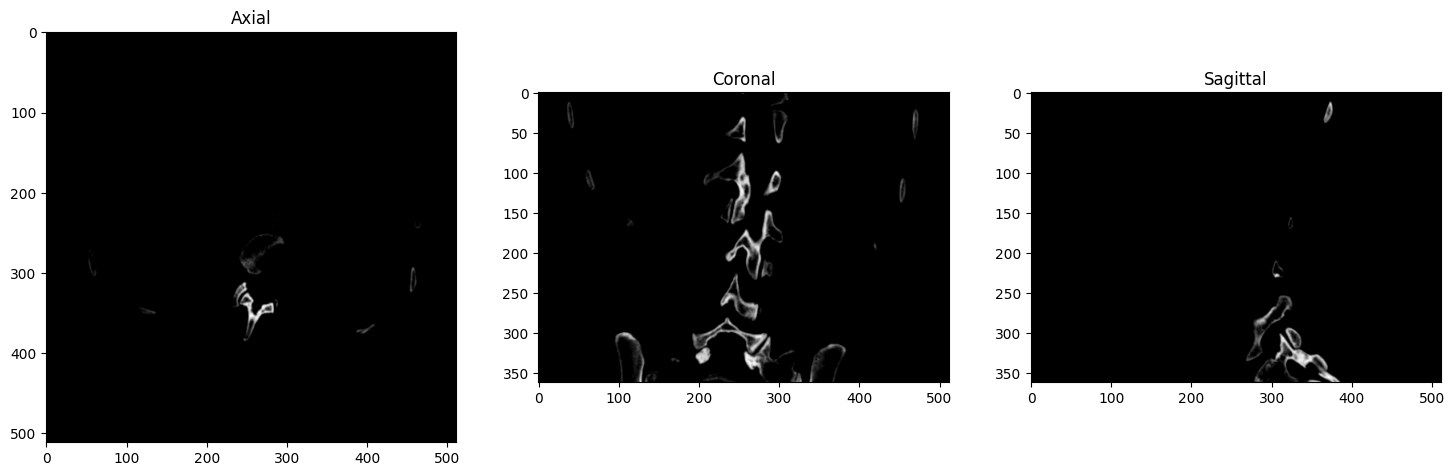

In [5]:
# ----------------------------------------------------------------------------------------------------------------------------

@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1),\
                  sagittal_slice=(0,n2-1))
def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))



  global axial_slice_segmentation

  global coronal_slice_segmentation

  global sagittal_slice_segmentation
  


  # Show the specfied slice on the axial plane with 'gray' color-map
  # and axial aspect ratio.
  ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  axial_slice_segmentation = axial_slice
  ax[0].axis('off')
  ax[0].set_title('Axial')
  # Show the specified slice on the coronal plane with 'gray' color-map
  # and coronal aspect ratio.
  ax[1].imshow(vol[:,coronal_slice,:], cmap='gray', aspect= coronal_asp)
  coronal_slice_segmentation = coronal_slice
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map
  # and sagittal aspect ratio.
  ax[2].imshow(vol[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  sagittal_slice_segmentation = sagittal_slice
  ax[2].axis('off')
  ax[2].set_title('Sagittal')

  #plt.imshow(vol[:,:,sagittal_slice])
  #plt.show()
  #print("sagittal_slice",sagittal_slice)



# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////



def bone_segmentation_func():

    # Load DICOM file
    #ds = pydicom.dcmread('C:/Users/LENOVO/Desktop/BMD 404/project/data/series-000001/image-000028.dcm')


    
    bone_segmented_image_axial_slice = vol[axial_slice_segmentation,:,:]

    bone_segmented_image_coronal_slice = vol[:,coronal_slice_segmentation,:]
    
    bone_segmented_image_sagittal_slice = vol[:,:,sagittal_slice_segmentation]




    # Convert pixel values to Hounsfield units (HU)
    intercept = dcm.RescaleIntercept
    slope = dcm.RescaleSlope
    #hu_image = dcm.pixel_array * slope + intercept
    hu_image_axial = bone_segmented_image_axial_slice * slope + intercept
    hu_image_coronal = bone_segmented_image_coronal_slice * slope + intercept
    hu_image_sagittal = bone_segmented_image_sagittal_slice * slope + intercept


    # Clip the HU values to the desired range
    hu_min = 300
    hu_max = 1800
    # clipped_image = np.clip(hu_image, hu_min, hu_max)
    clipped_image_axial = np.clip(hu_image_axial, hu_min, hu_max)
    clipped_image_coronal = np.clip(hu_image_coronal, hu_min, hu_max)
    clipped_image_sagittal = np.clip(hu_image_sagittal, hu_min, hu_max)



    # Normalize the clipped image to the range [0, 1]
    # normalized_image = (clipped_image - hu_min) / (hu_max - hu_min)
    normalized_image_axial = (clipped_image_axial - hu_min) / (hu_max - hu_min)
    normalized_image_coronal = (clipped_image_coronal - hu_min) / (hu_max - hu_min)
    normalized_image_sagittal = (clipped_image_sagittal - hu_min) / (hu_max - hu_min)




    # Binarize the image using thresholding
    #threshold_value = 0.5
    #binary_image = np.where(normalized_image > threshold_value, 1, 0)

    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))
    ax1.imshow(normalized_image_axial, cmap= 'gray')
    ax1.set_title('Axial')
    ax2.imshow(normalized_image_coronal, cmap= 'gray')
    ax2.set_title('Coronal')
    ax3.imshow(normalized_image_sagittal, cmap= 'gray' )
    ax3.set_title('Sagittal')
    plt.show()

    global image_temp_gui_1_full,image_temp_gui_2_full,image_temp_gui_3_full
    #image1 = bone_image
    image_temp_gui_1_full = normalized_image_axial
    image_temp_gui_2_full = normalized_image_coronal
    image_temp_gui_3_full  = normalized_image_sagittal






# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////





def bone_segmentation_func_bone_only():


    bone_segmented_image_axial_slice = vol[axial_slice_segmentation,:,:]

    bone_segmented_image_coronal_slice = vol[:,coronal_slice_segmentation,:]
    
    bone_segmented_image_sagittal_slice = vol[:,:,sagittal_slice_segmentation]



       # Convert pixel values to Hounsfield units (HU)
    intercept = dcm.RescaleIntercept
    slope = dcm.RescaleSlope
    # hu_image = dcm.pixel_array * slope + intercept
    hu_image = bone_segmented_image_axial_slice * slope + intercept
    hu_image_2 = bone_segmented_image_coronal_slice * slope + intercept
    hu_image_3 = bone_segmented_image_sagittal_slice * slope + intercept



    # def window_image(original_image, window_center, window_width):
    def window_image(original_image, window_center, window_width):

        img_min = window_center - window_width // 2

        img_max = window_center + window_width // 2

        window_image = original_image.copy()

        window_image[window_image < img_min] = img_min

        window_image[window_image > img_max] = img_max


        return window_image


    def window_image_2(original_image, window_center, window_width):

        img_min = window_center - window_width // 2

        img_max = window_center + window_width // 2

        window_image = original_image.copy()

        window_image[window_image < img_min] = img_min

        window_image[window_image > img_max] = img_max


        return window_image


    def window_image_3(original_image, window_center, window_width):

        img_min = window_center - window_width // 2

        img_max = window_center + window_width // 2

        window_image = original_image.copy()

        window_image[window_image < img_min] = img_min

        window_image[window_image > img_max] = img_max


        return window_image


    bone_image = window_image(hu_image, 400, 1000)
    bone_image_2 = window_image_2(hu_image_2, 400, 1000)
    bone_image_3 = window_image_3(hu_image_3, 400, 1000)
    

    #global image1


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))
    ax1.imshow(bone_image, cmap= 'gray')
    ax1.set_title('Axial')
    ax2.imshow(bone_image_2, cmap= 'gray')
    ax2.set_title('Coronal')
    ax3.imshow(bone_image_3 , cmap= 'gray')
    ax3.set_title('Sagittal')
    plt.show()
    
    global image_temp_gui_1,image_temp_gui_2,image_temp_gui_3
    #image1 = bone_image
    image_temp_gui_1 = bone_image
    image_temp_gui_2 = bone_image_2
    image_temp_gui_3  = bone_image_3



# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


button = widgets.Button(description="Bone Segmentation")
display(button)

def on_button_clicked(b):
    print("working on the bone segmentation of the images please wait. .....")

    bone_segmentation_func_bone_only()
    bone_segmentation_func()
        
    # /*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/**/*/
        
    if b.description == "Bone Segmentation":


        # Create a custom tkinter application
        app = ctk.CTk()
        app.geometry("800x600")
        app.title("Image Viewer")

        # Load your images
        #image1 = Image.open("C:/Users/LENOVO/Desktop/BMD 404/project/pic/rm378-07.jpg")

        # Convert the NumPy array to a PIL Image
        #image = Image.fromarray(image1)

        global image_gui_1,image_gui_2,image_gui_3
        image_gui_1 = Image.fromarray(image_temp_gui_1)
        image_gui_2 = Image.fromarray(image_temp_gui_2)
        image_gui_3 = Image.fromarray(image_temp_gui_3)
        global photo1,photo2,photo3
        photo1 = ImageTk.PhotoImage(image_gui_1)
        photo2 = ImageTk.PhotoImage(image_gui_2)
        photo3 = ImageTk.PhotoImage(image_gui_3)

        
        global image_gui_1_full,image_gui_2_full,image_gui_3_full
        image_gui_1_full = Image.fromarray(image_temp_gui_1_full)
        image_gui_2_full = Image.fromarray(image_temp_gui_2_full)
        image_gui_3_full = Image.fromarray(image_temp_gui_3_full)
        global photo1_full,photo2_full,photo3_full
        photo1_full = ImageTk.PhotoImage(image_gui_1_full)
        photo2_full = ImageTk.PhotoImage(image_gui_2_full)
        photo3_full = ImageTk.PhotoImage(image_gui_3_full)


        # Create a function to display the images
        def display_images():
            # Create a new window using CTkToplevel
            toplevel = ctk.CTkToplevel(app)
            toplevel.title("Image Viewer")

            # Convert images to PhotoImage format

            # Create CTkLabel widgets to display the images
            label1 = ctk.CTkLabel(toplevel)
            label1.configure(image = photo1)
            label1.grid(row=1, column=1)  # Position label at row 2, column 2
            #label1.pack()
            label1.image = photo1  # Keep a reference to avoid garbage collection


            # Create CTkLabel widgets to display the images
            label2 = ctk.CTkLabel(toplevel)
            label2.configure(image = photo2)
            label2.grid(row=1, column=2)  # Position label at row 2, column 2
            #label2.pack()
            label2.image = photo2  # Keep a reference to avoid garbage collection


            label3 = ctk.CTkLabel(toplevel)
            label3.configure(image = photo3)
            label3.grid(row=1, column=3)  # Position label at row 2, column 2
            #label3.pack()
            label3.image = photo3  # Keep a reference to avoid garbage collection






            # Create CTkLabel widgets to display the images
            label1_full = ctk.CTkLabel(toplevel)
            label1_full .configure(image = photo1_full)
            label1_full .grid(row=2, column=1)  # Position label at row 2, column 2
            #label1.pack()
            label1_full .image = photo1_full  # Keep a reference to avoid garbage collection


            # Create CTkLabel widgets to display the images
            label2_full  = ctk.CTkLabel(toplevel)
            label2_full .configure(image = photo2_full)
            label2_full .grid(row=2, column=2)  # Position label at row 2, column 2
            #label2.pack()
            label2_full .image = photo2_full  # Keep a reference to avoid garbage collection


            label3_full  = ctk.CTkLabel(toplevel)
            label3_full .configure(image = photo3_full)
            label3_full .grid(row=2, column=3)  # Position label at row 2, column 2
            #label3.pack()
            label3_full .image = photo3_full  # Keep a reference to avoid garbage collection














        # Create a button to trigger the image display
        button_gui = ctk.CTkButton(app, text="Display Images", command=display_images)
        button_gui.pack()

        # Start the application event loop
        app.mainloop()
    
# /*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/**/*/
    
button.on_click(on_button_clicked)






# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ****************************************************************************************************************************
# ----------------------------------------------------------------------------------------------------------------------------
# ****************************************************************************************************************************
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

